# Лабораторная работа №3

В рамках данной лабораторной работы вы проведете разведочный анализ данных.

**Требования:**
* Python >= 3.X
* Библиотеки `pandas`, `matplotlib`.

**Входные данные:**
* Файл sales.csv, в котором содержится информация о видеоиграх и их продажах. Каждая игра описана следующими признаками:
    1. `Rank` - рейтинг игры.    
    2. `Name` - название игры.    
    3. `Platform` - платформа (т.е. PC, PS4, и т.д.).    
    4. `Year` - год выпуска игры.    
    5. `Genre` - жанр игры.    
    6. `Publisher` - Publisher of the game.    
    7. `NA_Sales` - объем продаж в северной Америке (млн).    
    8. `EU_Sales` - объем продаж в Европе (млн).    
    9. `JP_Sales` - объем продаж в Японии (млн).    
    10. `Other_Sales` - объем продаж в остальном мире (млн).    
    11. `Global_Sales` - суммарные продажи в мире (млн).

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_2.1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_2.1_6207_ИвановИИ.ipynb**.

#### Сделайте необходимые импорты:

In [2]:
# !pip install matplotlib pandas numpy

import matplotlib.pyplot as plt
import pandas as pd

#### Загрузите данные в `pandas.DataFrame` и выведите первые и последние 15 строк.

In [21]:
df = pd.DataFrame(pd.read_csv('sales.csv'))
print(df.head(15), df.tail(15))

    Rank                         Name Platform    Year         Genre  \
0      1                   Wii Sports      Wii  2006.0        Sports   
1      2            Super Mario Bros.      NES  1985.0      Platform   
2      3               Mario Kart Wii      Wii  2008.0        Racing   
3      4            Wii Sports Resort      Wii  2009.0        Sports   
4      5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
5      6                       Tetris       GB  1989.0        Puzzle   
6      7        New Super Mario Bros.       DS  2006.0      Platform   
7      8                     Wii Play      Wii  2006.0          Misc   
8      9    New Super Mario Bros. Wii      Wii  2009.0      Platform   
9     10                    Duck Hunt      NES  1984.0       Shooter   
10    11                   Nintendogs       DS  2005.0    Simulation   
11    12                Mario Kart DS       DS  2005.0        Racing   
12    13  Pokemon Gold/Pokemon Silver       GB  1999.0  Role-Pla

#### Проверьте форму (`shape`) данных. Сколько всего объектов в датасете?

In [4]:
print(df.shape)

(16598, 11)


Ответ: 16597

#### Каковы максимальный и средний объем продаж во всем мире (см. `pandas.DataFrame.describe`)?

In [5]:
# print(df.describe())
print(df['Global_Sales'].max(), df['Global_Sales'].mean())

82.74 0.5374406555006628


Ответ: max = 82.74; mean = 0.537441

#### Какие типы имеют каждый из признаков (см. `pandas.DataFrame.info`)?

In [6]:
# print(df.info())
for column_name in df.columns.tolist():
    print(df[column_name].dtype)

int64
object
object
float64
object
object
float64
float64
float64
float64
float64


Ответ: int64, object, object, float64, object, object, float64, float64, float64, float64, float64

#### Оцените количество пропусков по каждому из признаков. Для числовых признаков заполните пропуски медианным значением, для прочих признаков удаляйте строки.

In [22]:
for column_name in df.columns.tolist():
    print(column_name, df[column_name].isnull().sum())
    if df[column_name].dtypes == float:
        df[column_name].fillna(df[column_name].median(), inplace=True)

df.dropna(inplace=True)    

Rank 0
Name 0
Platform 0
Year 271
Genre 0
Publisher 58
NA_Sales 0
EU_Sales 0
JP_Sales 0
Other_Sales 0
Global_Sales 0


#### Постройте круговую диаграмму количества игр в разрезе жанров. Подпишите каждый сектор. Какой жанр самый популярный?

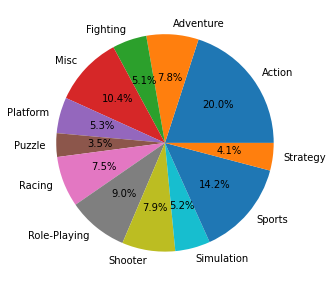

In [16]:
%matplotlib inline

genre_popularity = df['Genre'].astype(str).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(genre_popularity, labels=genre_popularity.index, autopct='%1.1f%%');

Ответ: Action

#### Постройте столбчатую диаграмму количества игр в разрезе игровых платформ. Столбцы должны идти в порядке убывания количества игр. Под какую платформу выпустили больше всего игр?

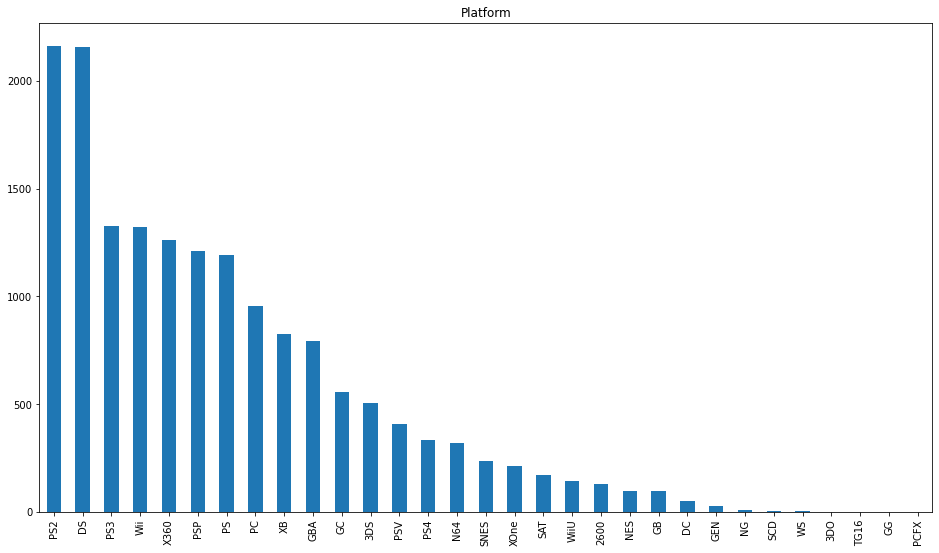

In [9]:
df['Platform'].value_counts().plot.bar(figsize=(16, 9), subplots=True);

Ответ: PS2 (DS - для исходных значений, без удаленных строк)

#### Постройте столбчатую диаграмму количества игр по годам. Столбцы должны идти в хронологическом порядке. Какая пятилетка была самой удачной для игростроя?

<BarContainer object of 40 artists>

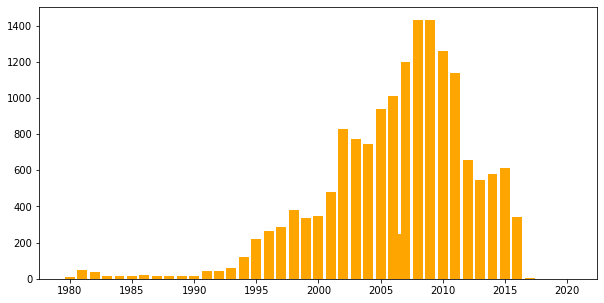

In [10]:
releases_per_year = df['Year'].astype(float).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(releases_per_year.index, releases_per_year, color='orange')

Ответ: 2007-2011

#### Постройте столбчатую диаграмму общих доходов игровой индустрии по годам. Столбцы должны идти в хронологическом порядке. Какой год был самым прибыльным?

<BarContainer object of 39 artists>

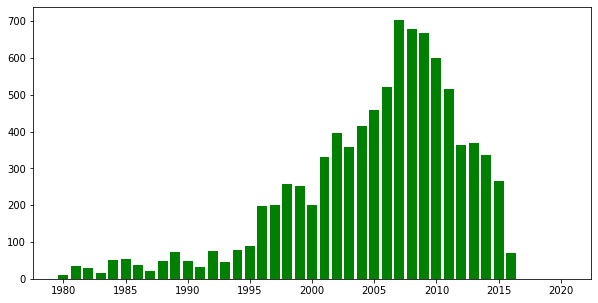

In [23]:
sales_per_year = df['Year'].astype(float).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(sales_per_year.index, [df[df['Year'] == i]['Global_Sales'].sum() for i in sales_per_year.index], color='g')

Ответ: 2007

#### Постройте диаграмму рассеивания между платформами и жанрами. Размер точки соответствует объему продаж. 

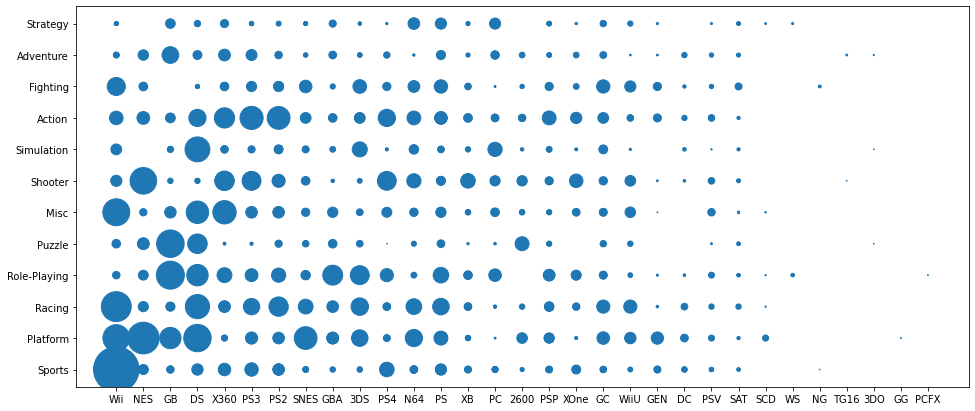

In [12]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.scatter(df['Platform'], df['Genre'], s=df['Global_Sales'] * 25)

#### Постройте линейный график объемов продаж шутеров в Японии по годам. Какой год был самым прибыльным?

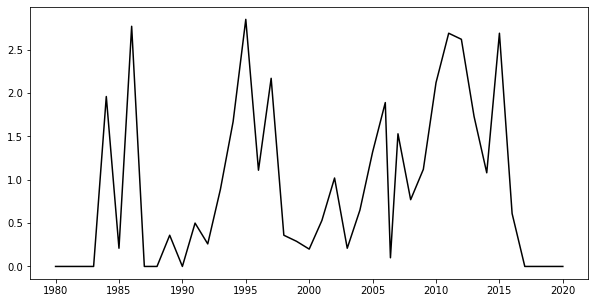

In [13]:
shooters_sales_Japan = df['Year'].astype(float).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(shooters_sales_Japan.index, [df[(df['Year'] == i) & (df['Genre'] == 'Shooter')]['JP_Sales'].sum() for i in shooters_sales_Japan.index], color='black')

Ответ: 1995

### Дополнительные вопросы

#### Какие игры являются самыми старыми?

In [14]:
print(df[df['Year'] == df['Year'].min()].Name.to_string(index=False))

      Asteroids
Missile Command
        Kaboom!
       Defender
         Boxing
     Ice Hockey
        Freeway
         Bridge
       Checkers


Ответ: 
Asteroids, 
Missile Command, 
Kaboom!, 
Defender, 
Boxing, 
Ice Hockey, 
Freeway, 
Bridge, 
Checkers

#### Сколько шутеров было выпущено в 2003 году?

In [15]:
print(len(df[(df['Year'] == 2003) & (df['Genre'] == 'Shooter')]))

73


Ответ: 73